In [5]:
#project 1

In [6]:
#pip install matplotlib seaborn # type: ignore
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # type: ignore
from sklearn.model_selection import train_test_split
import numpy as np

In [7]:
# Load the CSV file
data = pd.read_csv('iris.csv')
data.columns = data.columns.str.replace('"', '')  # Clean column names

# Display the first few rows of the dataset
print("Head of the dataset:")
print(data.head())

Head of the dataset:
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


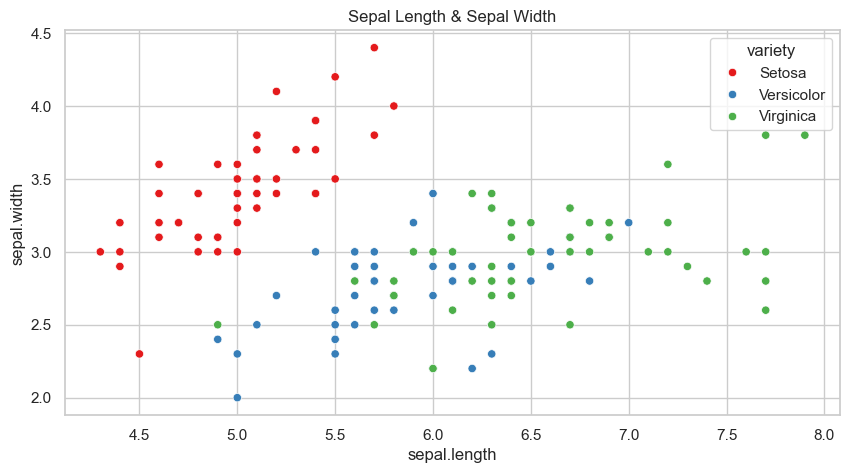

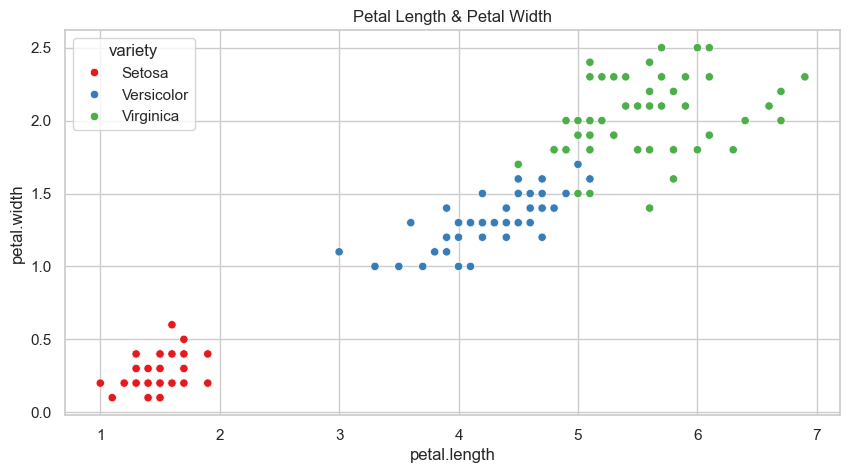

In [8]:
# Set plot style
sns.set(style="whitegrid")

# Scatter plot for Sepal Length and Sepal Width
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x="sepal.length", y="sepal.width", hue="variety", palette="Set1")
plt.title("Sepal Length & Sepal Width")
plt.show()

# Scatter plot for Petal Length and Petal Width
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x="petal.length", y="petal.width", hue="variety", palette="Set1")
plt.title("Petal Length & Petal Width")
plt.show()

In [9]:
# Encode the 'variety' column as numerical labels
data['variety'] = data['variety'].astype('category').cat.codes

# Define the feature matrix X and target vector y
X = data.drop(columns=['variety'])
y = data['variety']

# Specify the class to be removed (e.g., 0, 1, or 2)
class_to_remove = 0  # Change this value to remove a different class

# Filter out the specified class
mask = y != class_to_remove
X = X[mask]
y = y[mask]

# Reset the index after filtering
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Split the dataset into training and temporary sets (70% training, 30% temporary)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Split the temporary set into validation and test sets (15% each of the original data)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

In [10]:
# Display the shapes of the resulting datasets
print("Shapes of the datasets:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# Display the unique classes in the remaining data
classes = np.unique(y)
print(f"Remaining classes after filtering: {classes}")

Shapes of the datasets:
X_train: (70, 4), y_train: (70,)
X_val: (15, 4), y_val: (15,)
X_test: (15, 4), y_test: (15,)
Remaining classes after filtering: [1 2]


Now here we need to start the algarithm part:

In [11]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [ ]:
# Convert data to PyTorch tensors

X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val = torch.tensor(X_val.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [42]:
y

0     1
1     1
2     1
3     1
4     1
     ..
95    2
96    2
97    2
98    2
99    2
Name: variety, Length: 100, dtype: int8

'1.12.0'

In [17]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]


In [44]:
batch_size = 10
for i, j in data_iter(batch_size, X_train, y_train):
    print(i, '\n', j)
    break

tensor([[5.6000, 2.7000, 4.2000, 1.3000],
        [6.4000, 3.1000, 5.5000, 1.8000],
        [6.9000, 3.1000, 5.4000, 2.1000],
        [6.1000, 2.9000, 4.7000, 1.4000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [6.3000, 3.3000, 4.7000, 1.6000],
        [7.7000, 3.8000, 6.7000, 2.2000],
        [6.6000, 3.0000, 4.4000, 1.4000],
        [6.3000, 2.7000, 4.9000, 1.8000],
        [5.7000, 2.9000, 4.2000, 1.3000]]) 
 tensor([[1.],
        [2.],
        [2.],
        [1.],
        [1.],
        [1.],
        [2.],
        [1.],
        [2.],
        [1.]])


In [45]:
W = torch.normal(0, 0.01, size=(4,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [47]:
W,b

(tensor([[-2.2773e-03],
         [ 3.0329e-02],
         [-6.8298e-05],
         [-7.0444e-04]], requires_grad=True),
 tensor([0.], requires_grad=True))

In [50]:
def linreg(X, w, b): #@save
    """Linear Reression"""
    return torch.matmul(X, w) + b

In [51]:
def squared_loss(y_hat, y): #@save
    """MSL"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [53]:
def sgd(params, lr, batch_size): #@save
    """⼩批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [57]:
#training
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
features, labels = X_train,y_train

In [58]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, W, b), y) # X和y的⼩批量损失
        # 因为l形状是(batch_size,1)，⽽不是⼀个标量。l中的所有元素被加到⼀起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([W, b], lr, batch_size) # 使⽤参数的梯度更新参数
        with torch.no_grad():
            train_l = loss(net(features, W, b), labels)
            print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')


epoch 1, loss 2.290568
epoch 1, loss 5.218939
epoch 1, loss 12.122312
epoch 1, loss 16.082863
epoch 1, loss 33.239883
epoch 1, loss 60.152519
epoch 1, loss 109.528114
epoch 2, loss 167.551086
epoch 2, loss 386.888000
epoch 2, loss 806.239685
epoch 2, loss 1709.731201
epoch 2, loss 2296.375000
epoch 2, loss 3019.550049
epoch 2, loss 5445.080078
epoch 3, loss 13538.125977
epoch 3, loss 17483.568359
epoch 3, loss 27063.542969
epoch 3, loss 38499.480469
epoch 3, loss 77760.187500
epoch 3, loss 134338.390625
epoch 3, loss 263756.906250
